### CS102 - Further Computing

Mark Howard<br>
School of Mathematical & Statistical Sciences<br>
NUI Galway<br>
mark.howard@nuigalway.ie

### 4. Aspects of Machine Learning


# Week 9: Intro to Machine Learning
* Machine learning involves building mathematical models to help understand data. 
* "Learning" enters the picture when we give these models **tunable parameters that can be adapted** to observed data
* In this way the program can be considered to be "learning" from the data. 
* Once these models have been fit to previously seen data, they **can be used to predict and understand** aspects of newly observed data. 

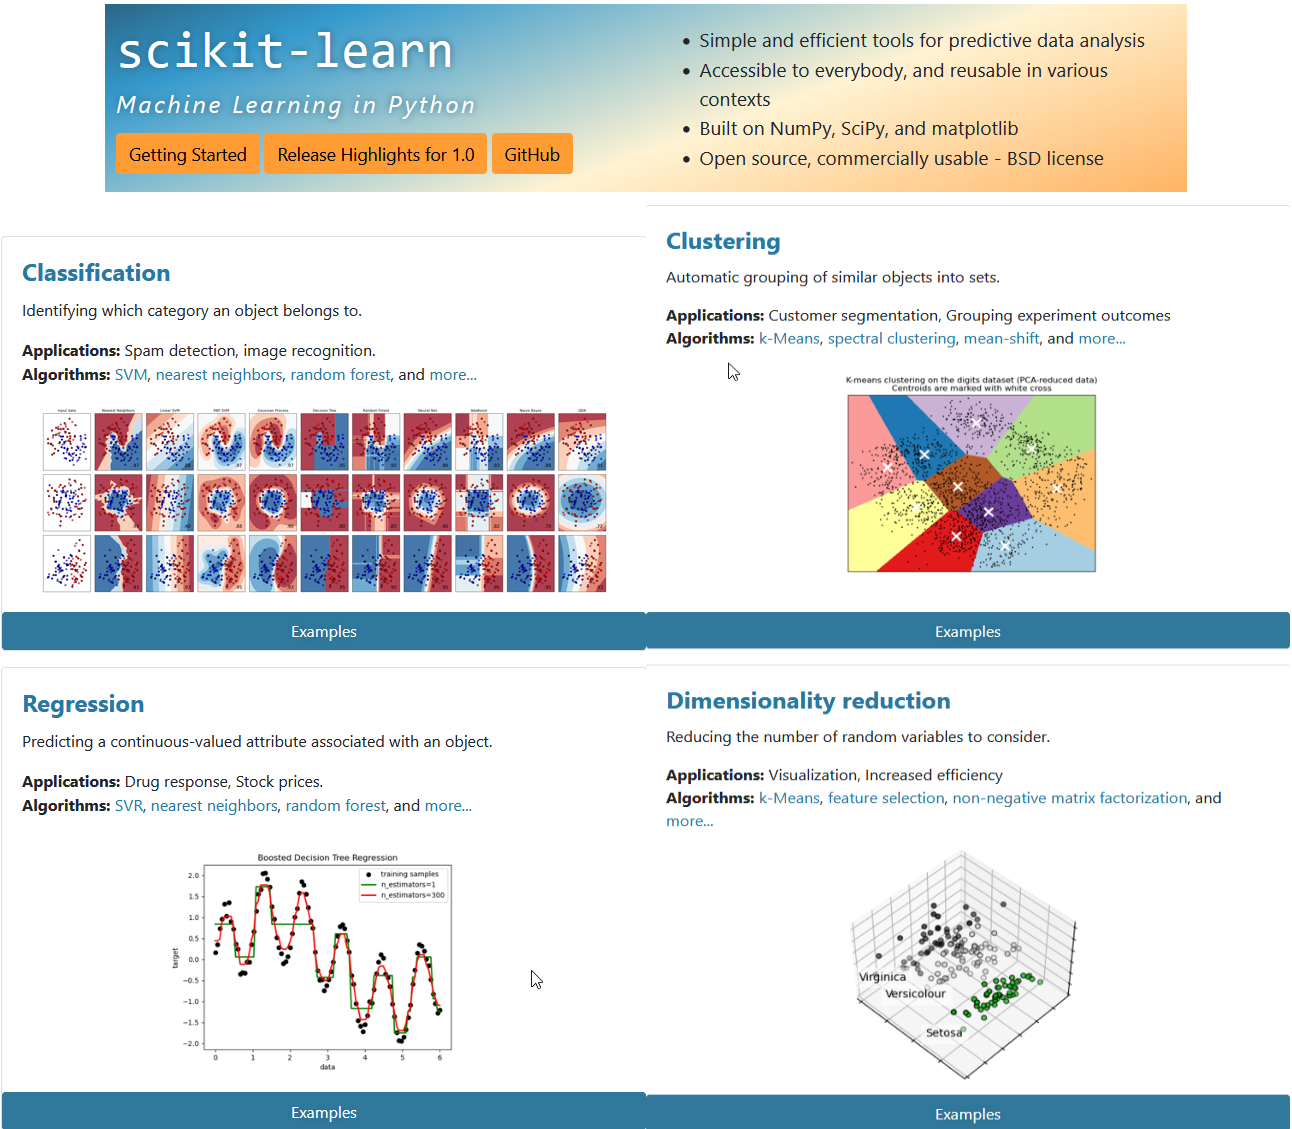

## Flavours of Machine Learning Problem
* To use ML tools effectively, we need to understand the problem setting.
* Machine learning can be categorized into two main types:
 #### 1. Supervised Learning (Today)
 #### 2. Unsupervised Learning (Later)

#### 1. Supervised Learning
* Supervised learning involves somehow modeling the **relationship between measured features of data and some label associated with the data**; 
* Once this model is determined, it **can be used to apply labels to new, unknown data**. 

Supervised Learning is further subdivided into 
* **Classification tasks:** Here the labels are **discrete** categories
* **Regression tasks**:  Here the labels are **continuous** quantities. 
 
We will see examples of both types of supervised learning

#### Classification is an example of supervised learning

<center>
 <img src="images/supervised.png" width=800 height=800 />
</center>

#### Classification tasks are fun
* You probably already know some from the internet (e.g., label in {Chihuahua, Blueberry Muffin})

<center>
 <img src="images/Screenshot%202022-03-04%20at%2010.40.34.png" width=600 height=600 />
</center>


## Our first classification task will be to categorise an Iris
We are going to use the iris flowers dataset. This dataset is famous because it is used as the “hello world” dataset in machine learning and statistics by pretty much everyone.

<center>
 <img src="images/Screenshot%202022-03-03%20at%2015.51.15.png" width=800 />
</center>

The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 8] #This is just changing default size in Jupyter NB
plt.rcParams['figure.dpi'] = 100 # Ditto

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
# Load libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [ ]:
dataset.head()

## Familiarise yourself with the data.

Let's take a look at the data a few different ways:

   * Dimensions of the dataset.
   * Peek at the data itself.
   * Statistical summary of all attributes.
   * Breakdown of the data by the class variable.

In [ ]:
# shape
dataset.shape

In [ ]:
# head
dataset.head()

In [ ]:
# descriptions
dataset.describe()

In [ ]:
# class distribution
dataset.groupby('class').size()

In [ ]:
# Separate out and visualize the sepal length for different irises
setosa_sepal_length=dataset.loc[dataset['class']=='Iris-setosa']['sepal-length']
versicolor_sepal_length=dataset.loc[dataset['class']=='Iris-versicolor']['sepal-length']
virginica_sepal_length=dataset.loc[dataset['class']=='Iris-virginica']['sepal-length']

In [ ]:
# Three overlayed histograms helps to compare distributions
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=10)
plt.hist(setosa_sepal_length, label='setosa', **kwargs)
plt.hist(versicolor_sepal_length, label='versicolor', **kwargs)
plt.hist(virginica_sepal_length, label='virginica', **kwargs)
plt.xlabel("Sepal Length (cm)");plt.ylabel("Frequency");
plt.legend();
plt.title('Sepal length distributions of different species');

In [ ]:
# Let's use 'barstacked' to see what the overall sepal length distribution looks like
sepaldata = [setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length]
kwargs = dict(histtype='barstacked', alpha=0.3, density=True, bins=10)
plt.hist(sepaldata,  label=['setosa','versicolor','virginica'], **kwargs)
plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.legend();

* A scatter plot matrix is a grid (or matrix) of scatter plots used to visualize bivariate relationships between combinations of variables. 
* Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart. 
* They are a great way to roughly determine if you have a linear correlation between multiple variables.
* Look out for diagonal or anti-diagonal "lines"

In [ ]:
# ?pd.plotting.scatter_matrix
# scatter plot matrix
pd.plotting.scatter_matrix(dataset)
plt.show()# The diagonal just shows the overall hist (compare shape with above)

* Diagonal lines suggest that e.g. petal length and petal width are strongly correlated. 
* We can quantify our visual inspection using a convenient statistical tool from `seaborn`

In [ ]:
import seaborn as sns
corrmat = dataset.corr()
sns.heatmap(corrmat, annot = True, square = True);

Seaborn has a convenient `pd.plotting.scatter_matrix` -like function, which has an option to colour-code the data points by class

In [ ]:
sns.pairplot(dataset, hue="class", height = 1.8);

## Now it is time to create some models

Ultimately, we want an algorithm that, given some measurements of an Iris, tells us whether it is 'setosa', 'versicolor' or 'virginica'.

#### Step 1. Create Training and Validation Datasets
We will split the loaded dataset into two:
* **Training Data:** Take ~80% of `dataset` which we will use to train, evaluate and select among our models,
* **Validation Data:** Remaining ~20% that we will hold back as a validation dataset.

There is a function called `train_test_split` in Scikit-learn to help with this

In [ ]:
?train_test_split

* An example of how `train_test_split` works

In [ ]:
X, y=np.arange(10).reshape((5,2)), np.arange(5)
print('X:')
print(X)
print('y=',y)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.33, random_state=42)
print('X_train:')
print(X_train)
print('y_train=',Y_train)

In [ ]:
print('X_validation:')
print(X_validation)
print('y_validation=',Y_validation)

* Back to the Iris dataset

In [ ]:
X_train, X_validation, Y_train, Y_validation\
= train_test_split(dataset[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']],\
                   dataset[['class']],  test_size=0.20, random_state=1)

In [ ]:
print(X_validation.shape)
X_validation.head()

In [ ]:
print(Y_validation.shape)
Y_validation.head()

#### Step 2. Decide what model to use 
**Decision trees** are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification. 
* For example, if you wanted to build a decision tree to classify an animal you come across while on a hike, you might construct the one shown here:


<center>
 <img src="images/Screenshot%202022-03-07%20at%2011.56.46.png" width=800 height=600 />
</center>


* It is easy to visualize how classification is accomplished when there are only two dimensions to the data (i.e., two columns in `X`).
* A decision tree built on this data will **iteratively split the data along one or the other axis** according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it. 

<center>
 <img src="images/Screenshot%202022-03-07%20at%2012.03.09.png" width=1700 />
</center>




<center>
 <img src="images/Screenshot%202022-03-04%20at%2014.16.25.png" width=1500 />
</center>


* The `Scikit-learn` syntax to do Decision Tree Classification is very concise:

In [ ]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)# Our model is a decision tree
mod_dt.fit(X_train,Y_train)# Train our model on the training data (the ~80%)
prediction=mod_dt.predict(X_validation) #Predict the class for validation portion of the dataset
print('The accuracy of the Decision Tree is')
print(accuracy_score(prediction,Y_validation)) # check if predictions were right

In [ ]:
# confusion_matrix:
# The first argument is true values, second argument is predicted values
# this produces a nclass x nclass numpy array 
print(confusion_matrix(Y_validation, prediction))

* The diagonals of the confusion matrix tells you which predictions you got right
* We can see that we got 1 out of 30 predictions wrong (29/30=0.96666)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(Y_validation, prediction),display_labels=['setosa', 'versicolor', 'virginica'])
disp.plot(cmap=plt.cm.Blues);

* Recall we used `mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)`
* Clearly the `max-depth` option should have an effect:
* It should get better, or at least **not worse, as we increase this parameter**
* Let's check:

In [ ]:
plt.rcParams['figure.figsize'] = [9, 8]
depth_list=np.array([1,2,3,4],dtype='int64')
accuracy_list=np.empty(4)

for j in depth_list:
    mod_dt = DecisionTreeClassifier(max_depth = j, random_state = 1)
    mod_dt.fit(X_train,Y_train)
    prediction=mod_dt.predict(X_validation)
    accuracy_list[j-1]=accuracy_score(prediction,Y_validation)

print(accuracy_list)
plt.plot(depth_list, accuracy_list)
plt.xticks([0,1,2,3,4]);plt.grid();plt.ylabel('accuracy');plt.xlabel('max depth');plt.axis([0, 4 ,0.333 ,1]);

* So, for this particular dataset and model, we do not improve results by making our model more complicated
* As a general rule of thumb you should accept the simplest model that is giving good results

We can try to gleam some insights by using the attribute `feature_importances_` calculated by Scikit-learn

In [ ]:
pd.Series(mod_dt.feature_importances_,index=["sepal_length", "sepal_width", "petal_length", "petal_width"])

It may also be helpful to view the decision tree 

In [ ]:
plot_tree(mod_dt, feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"], class_names = ['setosa', 'versicolor', 'virginica'], filled = True);plt.figure(figsize = (12,12));

* This decision tree bases all its decision on two attributes -- `petal_length` and `petal_width`


<center>
 <img src="images/DTBoundary0.png" width=900 height=900 />
</center>




<center>
 <img src="images/DTBoundary_slow.gif" width=1500 />
</center>



* These decision boundaries can look strange for high-dimensional data and high depth trees (especially if overfitting)
<br>

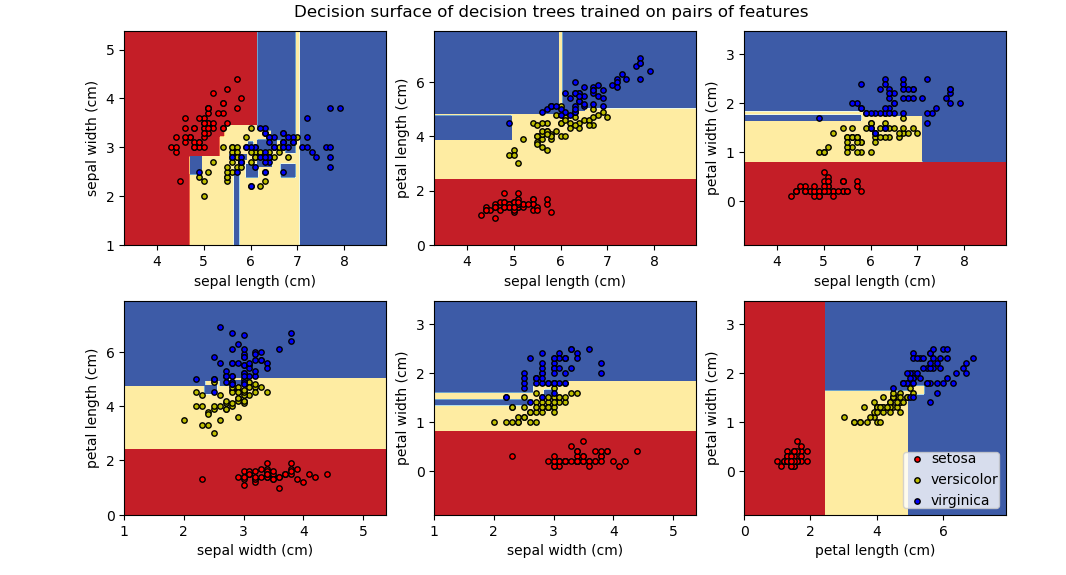

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(max_depth = 6, random_state = 42).fit(X, y)
    #clf=mod_dt.fit(X_train,Y_train)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #print(Z)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        #print(idx)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

### Overfitting
* Overfitting is a problem in Machine Learning, generally
* Typically, a model might be selected by maximizing its performance on some set of training data, and yet its suitability might be determined by its ability to perform well on unseen data
* Over-fitting occurs when a model begins to "memorize" training data rather than "learning" to generalize from a trend. 


<center>
 <img src="images/Screenshot%202022-03-07%20at%2015.16.46.png" width=500 height=500 />
</center>


* In the Decision surface pictures above, the long thin "fingers" are indicative of overfitting


* Such over-fitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from. 
* Another way to see this over-fitting is to look at models trained on different subsets of the data—for example, in this figure we train two different trees, each on half of the original data:


<center>
 <img src="images/Screenshot%202022-03-07%20at%2015.20.08.png" width=1200 />
</center>


* In some places, the two trees produce consistent results (e.g., in the four corners), while in other places, the two trees give very different classifications (e.g., in the regions between any two clusters).

* The key observation is that the inconsistencies tend to happen where the classification is less certain, and thus by using information from both of these trees, we might come up with a better result!
* This notion—that multiple overfitting estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging. 
* Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which over-fits the data, and averages the results to find a better classification. 
* An ensemble of randomized decision trees is known as a random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, np.squeeze(Y_train.values))
predicted = rf.predict(X_validation)
accuracy = accuracy_score(Y_validation, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')


<center>
 <img src="images/Screenshot%202022-03-08%20at%2011.56.19.png" width=1200 />
</center>


#### References
Further Reading<br>
* [What Is Machine Learning?](https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html)
* [Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)
* [Decision Trees and Random Forests](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)

#### Exercises
* Play around with different `train_test_split` values for `test_size`, and different `max_depth` values for `DecisionTreeClassifier`. See how high you can get the prediction accuracy.